In [3]:
# Import the OpenCV library
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [8]:
def segmentation(frame , k , d , e):
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # cv2.imshow('frame', thresh)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))

    # The larger the value, the more the dilation.
    # dilation increases the size of the foreground objects.
    # filling small gaps with white in the objects.
    dilated = cv2.dilate(thresh, kernel, iterations=d)
    # cv2.imshow('frame', dilated)

    # erosion decreases the size of the foreground objects. 
    eroded = cv2.erode(dilated, kernel, iterations=e)
    # cv2.imshow('frame', eroded)

    # dilation and erosion used to extract contours from a given frame
    contours, hierarchy = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

In [11]:

cap = cv2.VideoCapture('Project Video Test.mp4')

while True:
    ret, frame = cap.read()

    if not ret:
        break

    contours1 = segmentation(frame , 3, 2 ,2)
    contours2 = segmentation(frame , 7, 5 ,3)

    height, width, _ = frame.shape

    for contour in contours1:
        x, y, w, h = cv2.boundingRect(contour)

        if  y > 400  and x < width-100 :
            custom_height = 20 
            cv2.rectangle(frame, (x, y), (x + w, y + custom_height), (0, 255, 0),1)

    for contour in contours2:
        x, y, w, h = cv2.boundingRect(contour)

        if  y > 400 and x < width-100 :

            custom_height = 30 
            cv2.rectangle(frame, (x, y), (x + w, y + custom_height), (0, 0, 255),1)

            if y + 60 <= height :
                cv2.rectangle(frame, (x, y + 30), (x + w, y + 60), (0, 0, 255),1)

    cv2.imshow('frame', frame)

    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(-0.5, 1061.5, 634.5, -0.5)

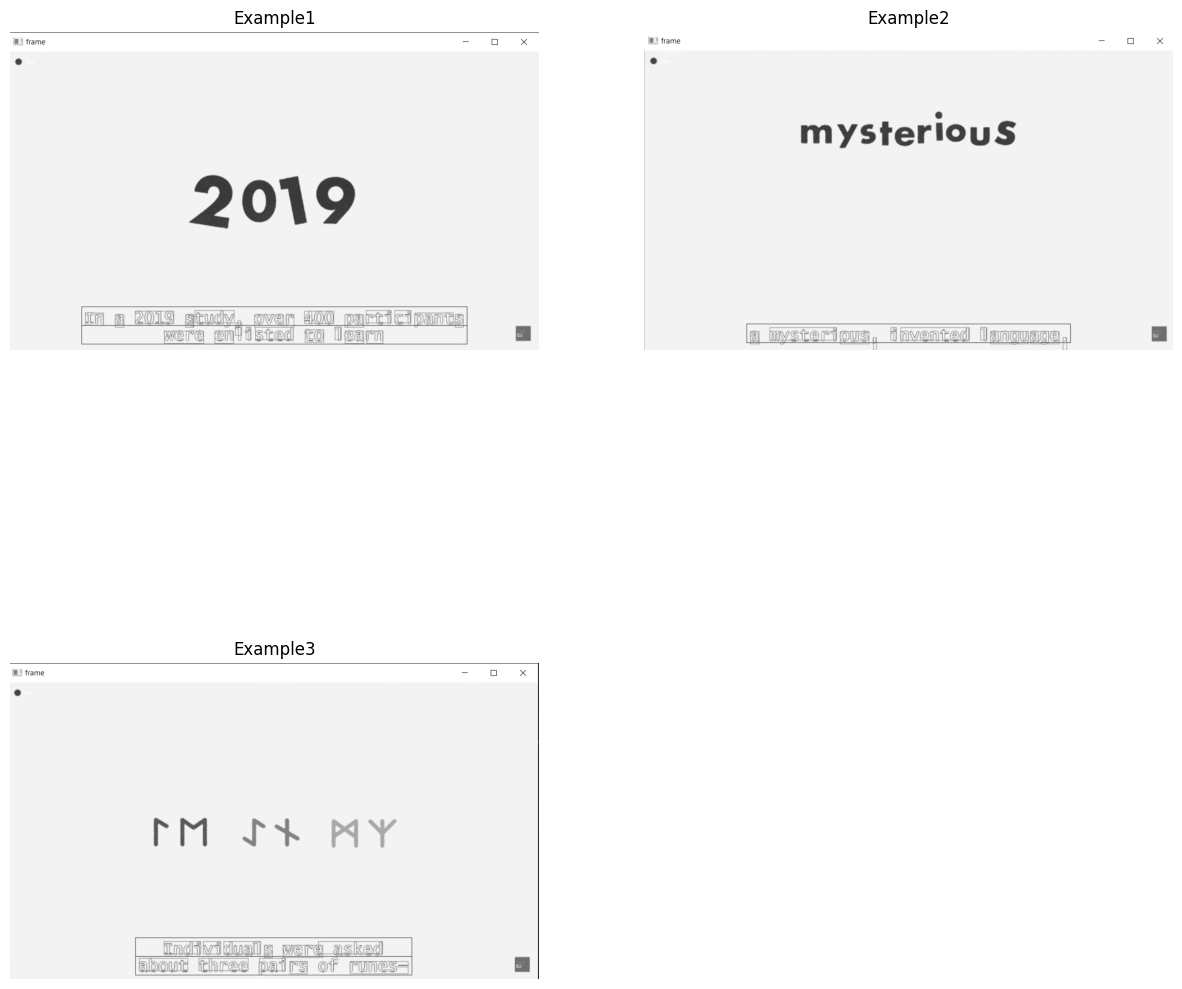

In [23]:
img1 = cv2.cvtColor(plt.imread('Example1.png') , cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(plt.imread('Example2.png') , cv2.COLOR_RGB2GRAY)
img3 = cv2.cvtColor(plt.imread('Example3.png') , cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(15, 15)) 

# Add a subplot at the 1st position 
fig.add_subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Example1")
plt.axis('off') 

fig.add_subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Example2")
plt.axis('off') 

fig.add_subplot(2, 2, 3)
plt.imshow(img3, cmap='gray')
plt.title("Example3")
plt.axis('off') 